## Samples collection from Archiver

In [10]:
import pandas as pd
import os
from sklearn.metrics import r2_score
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)  # 
import joblib
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
import yaml


In [11]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = ['hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl'] 
# pickle_files = ['hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl',
#                'hxr_archiver_Sep_updated.pkl', 'hxr_archiver_Oct_updated.pkl', 'hxr_archiver_Nov_updated.pkl'] 
            # 'hxr_archiver_Jan_updated.pkl', 'hxr_archiver_Feb_updated.pkl']
# pickle_files = ['hxr_archiver_MD_updated.pkl']
dfs = [pd.read_pickle(file_dir+file).reset_index(drop=True) for file in pickle_files]

all_df = pd.concat(dfs, axis=0, ignore_index=True)

print('Number of total samples:', all_df.shape[0])
# all_df.describe()

Number of total samples: 1708903


## Samples filtering

In [12]:
def dataset_filter(dataset):
    # Filtering based on multiple conditions
    condition = (dataset['hxr_pulse_intensity'] > 0.02) & (dataset['hxr_pulse_intensity'] < 3) & \
                (dataset['Bunch length at BC1'] > 200) & (dataset['Bunch length at BC1'] < 300) & \
                (dataset['Bunch length at BC2'] > 3e3) & (dataset['Bunch length at BC2'] < 1e5) & \
                (dataset['Charge at gun [pC]'] > 240) & (dataset['Charge at gun [pC]'] < 260) & \
                (dataset['Charge after BC1 [pC]'] < 200) & \
                (dataset['HXR electron energy [GeV]'] > 10) & (dataset['HXR photon energy [eV]'] > 900)
                # all_df['hxr_pulse_intensity'] > 0.05)
    return dataset[condition]


In [13]:
final_df = dataset_filter(all_df)
print('Number of samples after filtering:', final_df.shape[0])

# Specify the fraction of the dataset to select

final_df = final_df.sample(frac=0.5, random_state=11)
print('Number of final samples after random selection:', final_df.shape[0])
print('Features in samples:',final_df.keys())

Number of samples after filtering: 1212513
Number of final samples after random selection: 606256
Features in samples: Index(['QUAD:IN20:121:BACT', 'QUAD:IN20:122:BACT', 'QUAD:IN20:361:BACT',
       'QUAD:IN20:371:BACT', 'QUAD:IN20:425:BACT', 'QUAD:IN20:441:BACT',
       'QUAD:IN20:511:BACT', 'QUAD:IN20:525:BACT', 'QUAD:LI21:201:BACT',
       'QUAD:LI21:211:BACT', 'QUAD:LI21:221:BACT', 'QUAD:LI21:251:BACT',
       'QUAD:LI21:271:BACT', 'QUAD:LI21:278:BACT', 'QUAD:LI24:740:BACT',
       'QUAD:LI24:860:BACT', 'QUAD:LI26:201:BACT', 'QUAD:LI26:301:BACT',
       'QUAD:LI26:401:BACT', 'QUAD:LI26:501:BACT', 'QUAD:LI26:601:BACT',
       'QUAD:LI26:701:BACT', 'QUAD:LI26:801:BACT', 'QUAD:LI26:901:BACT',
       'QUAD:LTUH:440:BACT', 'QUAD:LTUH:460:BACT', 'QUAD:LTUH:620:BACT',
       'QUAD:LTUH:640:BACT', 'QUAD:LTUH:660:BACT', 'QUAD:LTUH:680:BACT',
       'QUAD:LTUS:640:BACT', 'QUAD:LTUS:660:BACT', 'QUAD:LTUS:680:BACT',
       'hxr_pulse_intensity', 'Bunch length at BC1', 'Bunch length at BC2',
  

## Distribution analysis for sample set



In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [6]:
quads_inj_bctrl = ['QUAD:IN20:121:BCTRL', 'QUAD:IN20:122:BCTRL', 'QUAD:IN20:361:BCTRL', 'QUAD:IN20:371:BCTRL', 
             'QUAD:IN20:425:BCTRL', 'QUAD:IN20:441:BCTRL', 'QUAD:IN20:511:BCTRL', 'QUAD:IN20:525:BCTRL']
quads_linac_bctrl = ['QUAD:LI21:201:BCTRL', 'QUAD:LI21:211:BCTRL', 'QUAD:LI21:221:BCTRL', 'QUAD:LI21:251:BCTRL', 
               'QUAD:LI21:271:BCTRL', 'QUAD:LI21:278:BCTRL', 'QUAD:LI24:740:BCTRL', 'QUAD:LI24:860:BCTRL', 
               'QUAD:LI26:201:BCTRL', 'QUAD:LI26:301:BCTRL', 'QUAD:LI26:401:BCTRL', 'QUAD:LI26:501:BCTRL', 
               'QUAD:LI26:601:BCTRL', 'QUAD:LI26:701:BCTRL', 'QUAD:LI26:801:BCTRL', 'QUAD:LI26:901:BCTRL']
quads_ltuh_bctrl = ['QUAD:LTUH:440:BCTRL', 'QUAD:LTUH:460:BCTRL', 'QUAD:LTUH:620:BCTRL', 'QUAD:LTUH:640:BCTRL', 
              'QUAD:LTUH:660:BCTRL', 'QUAD:LTUH:680:BCTRL']
quads_ltus_bctrl = ['QUAD:LTUS:BCTRL', 'QUAD:LTUS:640:BCTRL', 'QUAD:LTUS:660:BCTRL', 'QUAD:LTUS:680:BCTRL']
quads_all_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + quads_ltus_bctrl
# get the BACT PV lists for quads
quads_inj_bact = [quad.replace("BCTRL", "BACT") for quad in quads_inj_bctrl] 
quads_linac_bact = [quad.replace("BCTRL", "BACT") for quad in quads_linac_bctrl] 
quads_ltuh_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltuh_bctrl] 
quads_ltus_bact = [quad.replace("BCTRL", "BACT") for quad in quads_ltus_bctrl] 

blen = ['BLEN:LI21:265:AIMAX1H', 'BLEN:LI24:886:BIMAX1H']
bcharge_gun = ['SIOC:SYS0:ML00:CALC038']
bcharge_bc1 = ['SIOC:SYS0:ML00:CALC252']
bcharge = bcharge_gun + bcharge_bc1 # at gun, after BC1 # ['BPMS:IN20:221:TMIT1H', 'BPMS:LI21:233:TMIT1H', 'BPMS:LI24:801:TMIT1H'] # at gun, BC1, BC2 
hxr_beam_energy = ['BEND:DMPH:400:BACT']
hxr_photon_energy = ['SIOC:SYS0:ML00:AO627']
hxr_energy = hxr_beam_energy + hxr_photon_energy # beam energy, photon energy
sxr_energy = ['BEND:DMPS:400:BDES','SIOC:SYS0:ML00:AO628']
laser_iris_status = ['IRIS:LR20:130:CONFG_SEL'] # the number of states represents the iris size: 1 [1.8mm], 2 [1.6mm], 3 [1.4mm], 4 [1.2mm], 5 [1.1mm], 6 [1.0mm], 7 [0.8mm]

status_name = ['Bunch length at BC1', 'Bunch length at BC2', 'Charge at gun [pC]', 'Charge after BC1 [pC]', 
               'HXR electron energy [GeV]', 'laser_iris_status']
status_from_archive = blen + bcharge + hxr_energy + laser_iris_status
beam_status = ['Charge at gun [pC]', 'Charge after BC1 [pC]', 'HXR electron energy [GeV]', 'HXR photon energy [eV]',
               'Bunch length at BC1', 'Bunch length at BC2']
# final_columns = ['timestamp'] + quads_inj + quads_linac + quads_ltuh + ['hxr_pulse_intensity'] + status_name

In [7]:
# final_df = all_df # if no filtering

input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact #+ beam_status
# input_cols = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
output_cols = ['hxr_pulse_intensity']
input_size =len(input_cols)
output_size = len(output_cols)

# final_df[input_cols].describe()

In [8]:

# Initialize dictionary for YAML
yaml_dict = {
    'input_variables': {},
    'output_variables': {}
}

# Populate the dictionary for input variables
for col in input_cols:
    lower_bound, default_value, upper_bound = final_df[col].quantile([0.25, 0.5, 0.75])
    # lower_bound, default_value, upper_bound = final_df[col].values.min(), final_df[column].values.mean(), final_df[column].values.max()
    
    yaml_dict['input_variables'][col] = {
        'variable_type': 'scalar',
        'default': default_value,
        'is_constant': False,
        'value_range': [lower_bound, upper_bound]
    }

# Populate the dictionary for output variables
for col in output_cols:
    yaml_dict['output_variables'][col] = {
    "variable_type": "scalar"
}

# Save the dictionary to a YAML file
# file_path = './feature_config.yaml'
# with open(file_path, 'w') as file:
#     yaml.dump(yaml_dict, file, sort_keys=False)


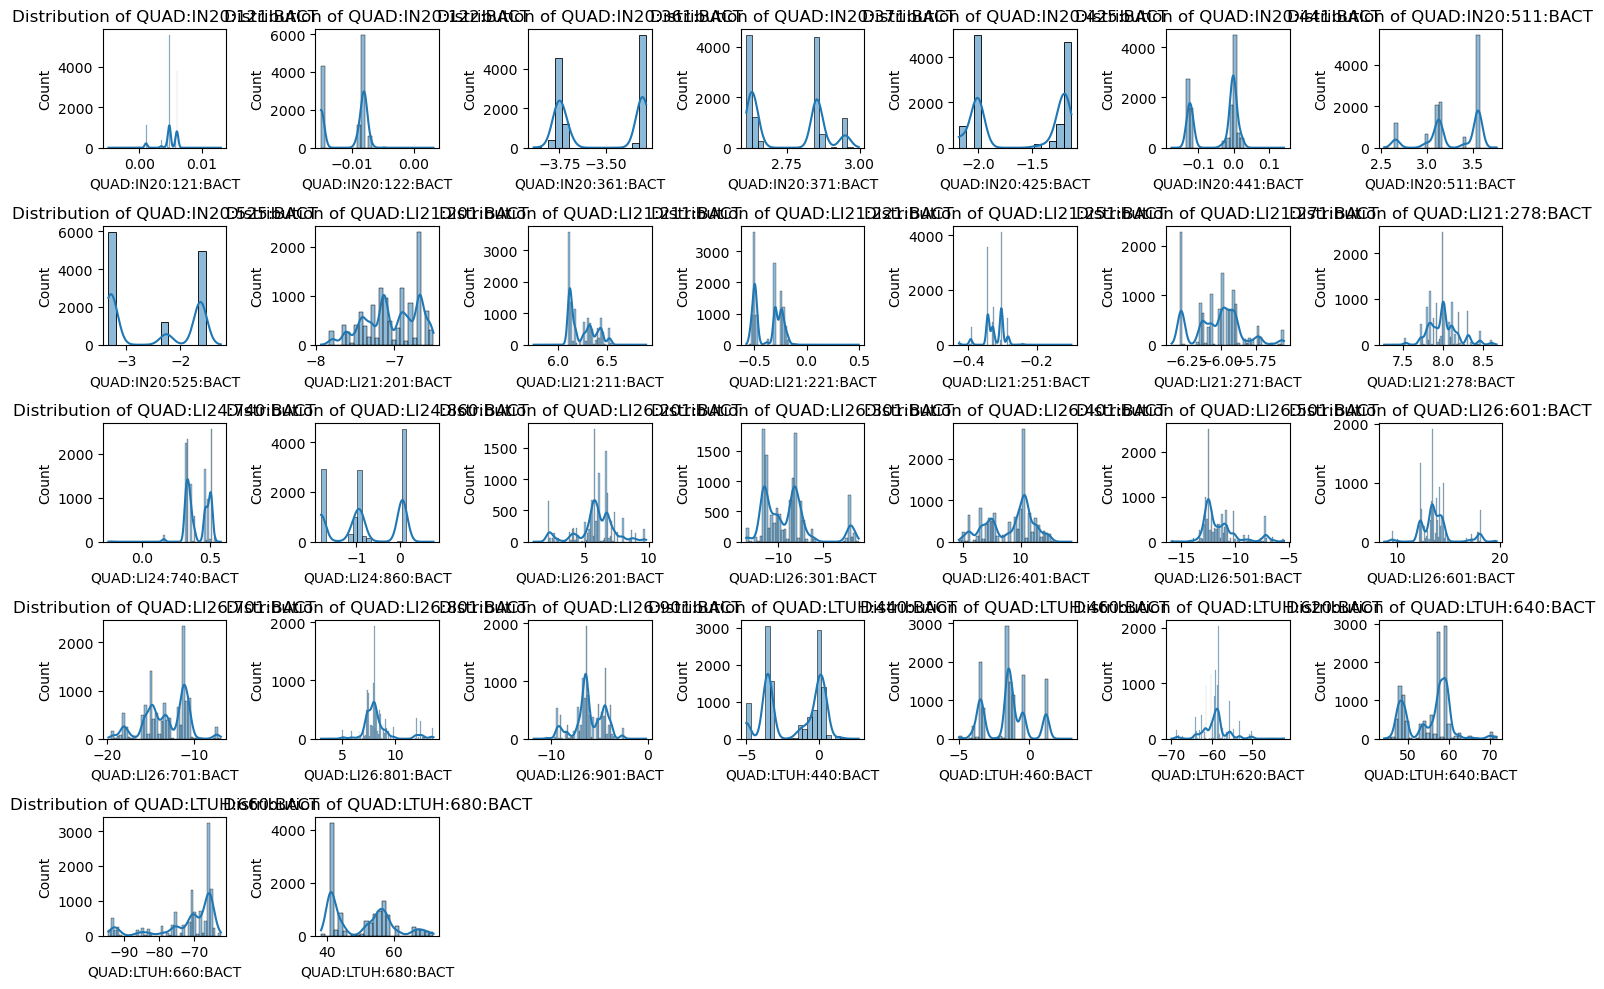

In [9]:
all_cols = input_cols #+ output_cols
plt.figure(figsize=(15, 10))
for feature in all_cols:
    plt.subplot(5, 7, all_cols.index(feature) + 1)  # Adjust the subplot layout based on number of features
    sns.histplot(final_df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
# Select a subset of features for diversity analysis
selected_features = input_cols # + output_cols

# Pair plot for selected features
sns.pairplot(final_df[selected_features])
plt.suptitle("Pair Plot of Input Features", y=1.02)
plt.show()

## Build NN model with Pytorch

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from botorch.utils import standardize
from botorch.models.transforms.input import AffineInputTransform, Normalize
import time

In [10]:
# Create a Dataset class for PyTorch
class MyDataset(Dataset):
    def __init__(self, dataframe, input_cols, output_cols):
        self.features = dataframe[input_cols].values
        self.outputs = dataframe[output_cols].values

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        x = torch.tensor(self.features[idx], dtype=torch.float32)
        y = torch.tensor(self.outputs[idx], dtype=torch.float32)
        return x, y


In [11]:
# Split the dataset into training and testing sets
train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=39)

# Standardization with sklearn
# input_scaler = StandardScaler()
# train_df[input_cols] = input_scaler.fit_transform(train_df[input_cols])
# test_df[input_cols] = input_scaler.transform(test_df[input_cols])
# output_scaler = StandardScaler()
# train_df[output_cols] = output_scaler.fit_transform(train_df[output_cols])
# test_df[output_cols] = output_scaler.transform(test_df[output_cols])

# Standardization with botorch.models.transforms.input.AffineInputTransform
# input_means = final_df[input_cols].mean()
# input_stds = final_df[input_cols].std()
# output_means = final_df[output_cols].mean()
# output_stds = final_df[output_cols].std()
input_mins = final_df[input_cols].min()
input_maxs = final_df[input_cols].max()
output_mins = final_df[output_cols].min()
output_maxs = final_df[output_cols].max()
# Convert means and stds to PyTorch tensors
input_scaler = AffineInputTransform(d=input_size,coefficient=torch.tensor(input_maxs.values-input_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(input_mins.values, dtype=torch.float32))
output_scaler = AffineInputTransform(d=output_size,coefficient=torch.tensor(output_maxs.values-output_mins.values, dtype=torch.float32),
                                                     offset=torch.tensor(output_mins.values, dtype=torch.float32))

train_df[input_cols] = input_scaler.transform(torch.tensor(train_df[input_cols].values, dtype=torch.float32))
test_df[input_cols] = input_scaler.transform(torch.tensor(test_df[input_cols].values, dtype=torch.float32))
train_df[output_cols] = output_scaler.transform(torch.tensor(train_df[output_cols].values, dtype=torch.float32))
test_df[output_cols] = output_scaler.transform(torch.tensor(test_df[output_cols].values, dtype=torch.float32))

# Create DataLoader instances for training and testing
train_dataset = MyDataset(train_df, input_cols, output_cols)
test_dataset = MyDataset(test_df, input_cols, output_cols)

batch_size = 2048

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


### Create model in another way

In [12]:
def create_model(version: int = 0):
    if version == 0:
        model = nn.Sequential(
            nn.Linear(input_size, 100),
            nn.ELU(),
            nn.Linear(100, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 200),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(200, 100),
            nn.ELU(),
            nn.Dropout(p=0.05),
            nn.Linear(100, 32),
            nn.ELU(),
            nn.Linear(32, 1)
        )
    elif version == 1:
        model = nn.Sequential(
                nn.Linear(input_size, 256),
                nn.Sigmoid(),
                nn.Linear(256, 128),
                nn.Sigmoid(),
                nn.Linear(128, 128),
                nn.Sigmoid(),
                nn.Linear(128, 64),
                nn.Sigmoid(),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, 16),
                nn.Sigmoid(),
                nn.Linear(16, output_size)
        )
    elif version == 2:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.ReLU(),
                nn.Linear(32, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.ReLU(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.ReLU(),
                nn.Linear(32, output_size)
            )
    elif version == 3:
        model = nn.Sequential(
                nn.Linear(input_size, 32),
                nn.Sigmoid(),
                nn.Linear(32, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.Sigmoid(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 32),
                nn.Sigmoid(),
                nn.Linear(32, output_size)
            )
    elif version == 4:
        model = nn.Sequential(
                nn.Linear(input_size, 512),
                nn.ELU(),
                nn.Linear(512, 256),
                nn.ELU(),
                nn.Linear(256, 128),
                nn.ELU(),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Linear(64, 64),
                nn.ELU(),
                nn.Linear(64, 32),
                nn.ELU(),
                nn.Linear(32, 32),
                nn.ELU(),
                nn.Linear(32, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    elif version == 5:
        model = nn.Sequential(
                nn.Linear(input_size, 128),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(128, 64),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 64),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(64, 32),
                nn.ELU(),
                nn.Dropout(p=0.05),
                nn.Linear(32, 16),
                nn.ELU(),
                nn.Linear(16, output_size)
            )
    else:
        raise ValueError(f"Unknown model version {version}.")
    return model.float()

In [13]:

# Modify the create_model function to return a list of models
def create_ensemble_models(num_models, model_version=0):
    models = [create_model(model_version) for _ in range(num_models)]
    return models

# Train each model in the ensemble
def train_model(model, train_loader, criterion, optimizer, n_epochs=100):
    model.train()  # Set the model to training mode
    total_start_time = time.time()
    for epoch in range(n_epochs):
        epoch_start_time = time.time()  # Start time of the epoch
        running_loss = 0.0  # Accumulate losses over the epoch
        
        for inputs, targets in train_loader:
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, targets)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Optimize
            
            running_loss += loss.item() * inputs.size(0)  # Update total loss
        
        epoch_loss = running_loss / len(train_loader.dataset)  # Calculate average loss over the epoch
        epoch_end_time = time.time()  # End time of the epoch
        epoch_duration = epoch_end_time - epoch_start_time  # Calculate duration of the epoch
        
        # Print training log
        if epoch % 5 == 0:
            print(f"Epoch {epoch+1}/{n_epochs} - Loss: {epoch_loss:.4f} - Time: {epoch_duration:.2f} sec")
    
    total_end_time = time.time()  # End time of the entire training
    total_duration = total_end_time - total_start_time  # Calculate total training time
    
    # Print total training time
    print(f"Total training time: {total_duration:.2f} sec")

def bootstrap_dataset(dataset, subset_size):
    """
    Creates a bootstrapped subset of the dataset.
    
    Parameters:
        dataset (Dataset): The original dataset.
        
    Returns:
        Subset: A bootstrapped subset of the original dataset.
    """
    # Generate random indices with replacement
    indices = torch.randint(0, len(dataset), (subset_size,))
    subset = Subset(dataset, indices)
    return subset

def bootstrap_loaders(dataset, num_models, batch_size):
    """
    Creates DataLoaders for each model in the ensemble, each with a bootstrapped subset of the dataset.
    
    Parameters:
        dataset (Dataset): The original dataset to bootstrap from.
        num_models (int): The number of models in the ensemble.
        batch_size (int): The batch size for each DataLoader.
        
    Returns:
        list: A list of DataLoader instances, each corresponding to a bootstrapped subset of the dataset.
    """
    loaders = []
    for _ in range(num_models):
        subset = bootstrap_dataset(dataset, subset_size=subset_size)
        loader = DataLoader(subset, batch_size=batch_size, shuffle=True)
        loaders.append(loader)
    return loaders




In [14]:
# Example: Create an ensemble of 5 models
num_models = 30
subset_size = 200000
ensemble_models = create_ensemble_models(num_models, model_version=5)
# ensemble_models = [create_model(version=i % 6) for i in range(num_models)]  
ensemble_datasets = [bootstrap_dataset(train_dataset, subset_size=subset_size) for _ in range(num_models)]
ensemble_loaders = [DataLoader(ds, batch_size=batch_size, shuffle=True) for ds in ensemble_datasets]

# ensemble_loaders = bootstrap_loaders(train_dataset, num_models, batch_size)



In [ ]:
# Train each model with its respective DataLoader
for model, loader in zip(ensemble_models, ensemble_loaders):
    optimizer = optim.Adam(model.parameters(), lr=1e-4)
    criterion =nn.L1Loss()# nn.MSELoss()
    train_model(model, loader, criterion, optimizer, n_epochs=30)


Epoch 1/30 - Loss: 0.1645 - Time: 8.02 sec
Epoch 6/30 - Loss: 0.0766 - Time: 7.26 sec
Epoch 11/30 - Loss: 0.0725 - Time: 7.02 sec
Epoch 16/30 - Loss: 0.0700 - Time: 7.30 sec
Epoch 21/30 - Loss: 0.0685 - Time: 6.79 sec
Epoch 26/30 - Loss: 0.0675 - Time: 8.02 sec
Total training time: 223.01 sec
Epoch 1/30 - Loss: 0.1185 - Time: 7.21 sec
Epoch 6/30 - Loss: 0.0733 - Time: 7.28 sec
Epoch 11/30 - Loss: 0.0691 - Time: 7.54 sec
Epoch 16/30 - Loss: 0.0676 - Time: 7.30 sec
Epoch 21/30 - Loss: 0.0666 - Time: 6.86 sec
Epoch 26/30 - Loss: 0.0658 - Time: 7.52 sec
Total training time: 220.41 sec
Epoch 1/30 - Loss: 0.2919 - Time: 7.46 sec
Epoch 6/30 - Loss: 0.0824 - Time: 7.74 sec
Epoch 11/30 - Loss: 0.0766 - Time: 7.14 sec
Epoch 16/30 - Loss: 0.0735 - Time: 7.09 sec
Epoch 21/30 - Loss: 0.0714 - Time: 7.29 sec
Epoch 26/30 - Loss: 0.0698 - Time: 7.40 sec
Total training time: 227.25 sec
Epoch 1/30 - Loss: 0.2484 - Time: 9.80 sec
Epoch 6/30 - Loss: 0.0802 - Time: 8.28 sec
Epoch 11/30 - Loss: 0.0750 - Tim

In [13]:
def ensemble_predict(models, data_loader):
    all_predictions = []
    with torch.no_grad():
        for inputs, _ in data_loader:
            # Stack predictions from all models
            predictions = torch.stack([model(inputs) for model in models])
            all_predictions.append(predictions)
    all_predictions = torch.cat(all_predictions, dim=1)  # Shape: [num_models, num_samples, num_outputs]
    
    # Calculate mean and standard deviation across models for each sample
    mean_predictions = torch.mean(all_predictions, dim=0)
    std_predictions = torch.std(all_predictions, dim=0)
    
    return mean_predictions, std_predictions


In [157]:
mean_predictions, std_predictions = ensemble_predict(ensemble_models, test_loader)

# Assuming output_scaler has a method called _untransform to reverse the scaling
mean_predictions = output_scaler._untransform(mean_predictions)
std_predictions = output_scaler._untransform(std_predictions)



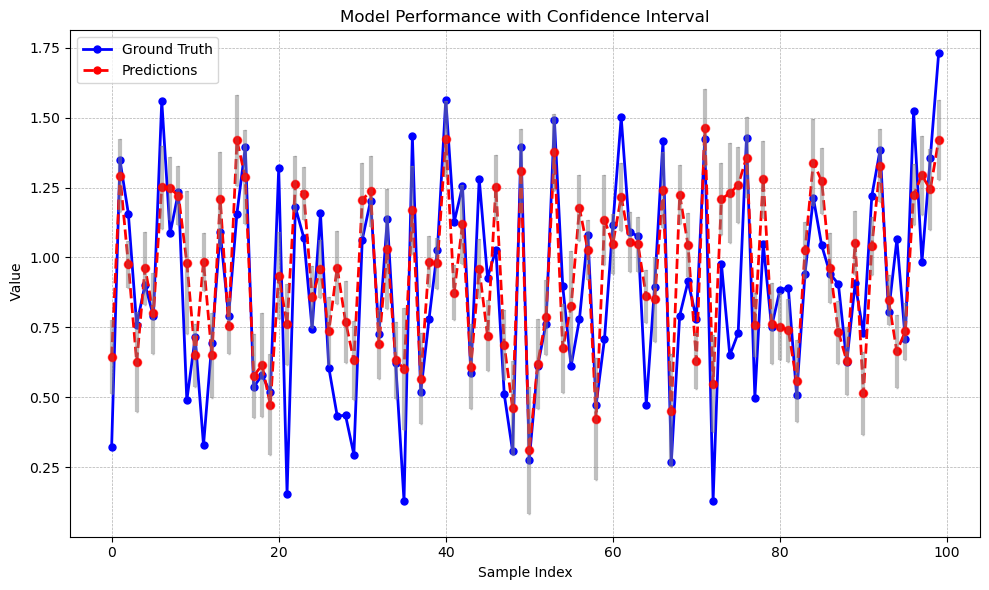

In [158]:


ground_truth = []
for _, targets in test_loader:
    ground_truth.extend(targets.numpy())

ground_truth = np.array(ground_truth)
ground_truth = output_scaler._untransform(torch.tensor(ground_truth))
# Convert predictions and std_dev to numpy
mean_predictions_np = mean_predictions.numpy().flatten()  # Adjust shape as necessary
std_predictions_np = std_predictions.numpy().flatten()  # Adjust shape as necessary



# Select a subset for plotting
num_samples_to_plot = 100
indices = np.random.randint(0, len(ground_truth) - 1, num_samples_to_plot)

# Slicing to select the subset
selected_ground_truth = ground_truth[indices]
selected_mean_predictions = mean_predictions_np[indices]
selected_std_predictions = std_predictions_np[indices]

# Plotting
plt.figure(figsize=(10, 6))

# X values (indices for the selected samples)
x_values = np.arange(num_samples_to_plot)

# Ground truth and predictions for the selected subset
plt.plot(x_values, selected_ground_truth, 'o-', label='Ground Truth', color='blue', linestyle='-', linewidth=2, markersize=5)
plt.plot(x_values, selected_mean_predictions, 'o--', label='Predictions', color='red', linestyle='--', linewidth=2, markersize=5)

# Error bars for the confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval)
error = 2 * selected_std_predictions
plt.errorbar(x_values, selected_mean_predictions, yerr=error, fmt='o', color='red', ecolor='gray', elinewidth=3, capsize=1, alpha=0.5)

plt.title('Model Performance with Confidence Interval')
plt.xlabel('Sample Index')
plt.ylabel(' Value')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()



## Test model performance on specific dataset

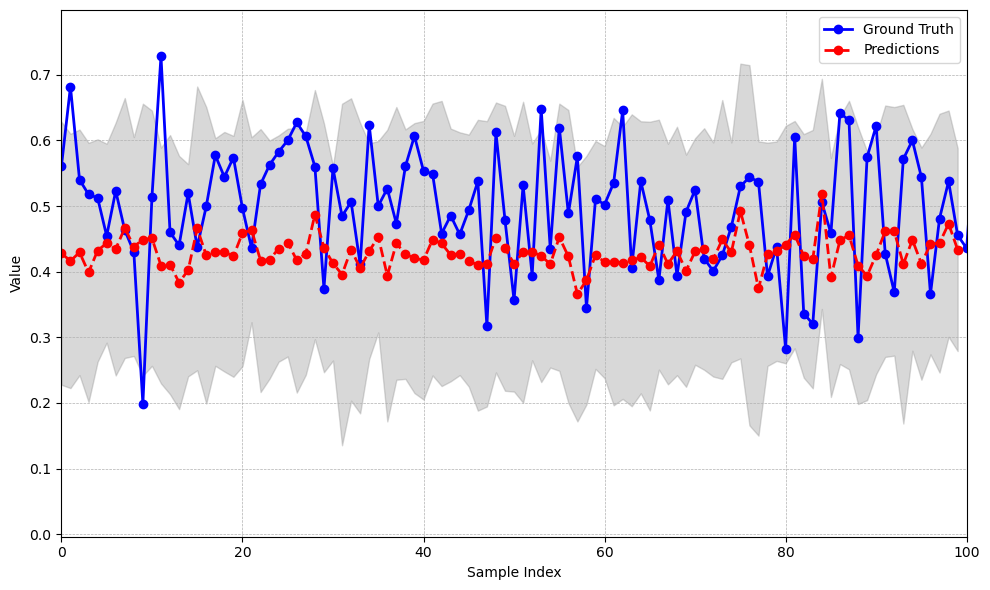

In [159]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = 'hxr_archiver_Febtest_updated.pkl'
new_test_df = pd.read_pickle(file_dir+pickle_files).reset_index(drop=True)

new_test_df = dataset_filter(new_test_df)
# input_cols_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact + beam_status
output_cols = ['hxr_pulse_intensity']


num_samples_to_plot = 100
indices = np.random.randint(0, new_test_df.shape[0] - 1, num_samples_to_plot)
selected_new_test_df = new_test_df.iloc[indices]

selected_new_test_df[input_cols] = input_scaler.transform(torch.tensor(selected_new_test_df[input_cols].values, dtype=torch.float32))

# Initialize TestDataset with sampled data
new_test_data = MyDataset(selected_new_test_df, input_cols, output_cols)
# Create a DataLoader for test dataset
new_test_loader = DataLoader(new_test_data, batch_size=10, shuffle=False)
# use the ensemble_predict function
new_mean_predictions, new_std_predictions = ensemble_predict(ensemble_models, new_test_loader)
new_mean_predictions = output_scaler._untransform(new_mean_predictions)
new_std_predictions = output_scaler._untransform(new_std_predictions)


ground_truth = new_test_df[output_cols].values

# Plotting
plt.figure(figsize=(10, 6))
shot_axis = np.arange(len(ground_truth))

# Ground truth and predictions for the selected subset
plt.plot(ground_truth, label='Ground Truth', color='blue', linestyle='-', marker='o', linewidth=2)
plt.plot(new_mean_predictions, label='Predictions', color='red', linestyle='--', marker='o', linewidth=2)
# plt.plot(new_mean_predictions_loaded, label='Predictions1', color='orange', linestyle='--', marker='o', linewidth=2)

# Confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval) for the selected subset
lower_bound = (new_mean_predictions - 2 * new_std_predictions).numpy().flatten()
upper_bound = (new_mean_predictions + 2 * new_std_predictions).numpy().flatten()
plt.fill_between(range(num_samples_to_plot), lower_bound, upper_bound, color='gray', alpha=0.3)


plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.xlim([0, num_samples_to_plot])
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Load another ensemble models and corresponding scaler

In [14]:
def load_ensemble_models(model_path, ensemble_name):
    """
    Load an ensemble of models along with input and output scalers.

    Parameters:
    - model_path: The base directory where the ensemble folder is located.
    - ensemble_name: The name of the ensemble folder.

    Returns:
    - loaded_models: A list of loaded PyTorch models.
    - loaded_input_scaler: The loaded input scaler.
    - loaded_output_scaler: The loaded output scaler.
    - loaded_input_cols: A list of input feature names.
    - loaded_output_cols: A list of output feature names.

    Raises:
    - FileNotFoundError: If any of the required files cannot be found.
    """
    ensemble_full_path = os.path.join(model_path, ensemble_name)

    # Check if ensemble directory exists
    if not os.path.exists(ensemble_full_path):
        raise FileNotFoundError(f"Ensemble directory {ensemble_full_path} does not exist.")

    # Load the YAML file
    vars_path = os.path.join(ensemble_full_path, 'feature_config.yaml')
    if not os.path.exists(vars_path):
        raise FileNotFoundError(f"Feature configuration file {vars_path} not found.")

    with open(vars_path, 'r') as file:
        config = yaml.safe_load(file)

    # Extract input and output columns
    loaded_input_cols = list(config['input_variables'].keys())
    loaded_output_cols = list(config['output_variables'].keys())

    # Load input and output scalers
    input_scaler_path = os.path.join(ensemble_full_path, 'lcls_fel_input_scaler.pt')
    output_scaler_path = os.path.join(ensemble_full_path, 'lcls_fel_output_scaler.pt')

    if not os.path.exists(input_scaler_path) or not os.path.exists(output_scaler_path):
        raise FileNotFoundError("One or both scaler files not found.")

    loaded_input_scaler = torch.load(input_scaler_path)
    loaded_output_scaler = torch.load(output_scaler_path)

    # Load each model
    loaded_models = []
    model_filenames = [f for f in os.listdir(ensemble_full_path) if f.startswith("model")]

    if not model_filenames:
        raise FileNotFoundError("No model files found in the ensemble directory.")

    sorted_model_filenames = sorted(
        model_filenames, key=lambda x: int(x.split('_')[1].split('.')[0])
    )

    for model_filename in sorted_model_filenames:
        each_model_path = os.path.join(ensemble_full_path, model_filename)
        if not os.path.exists(each_model_path):
            raise FileNotFoundError(f"Model file {each_model_path} not found.")
        model = torch.load(each_model_path)
        loaded_models.append(model)

    print(f"Ensemble models {ensemble_name} and scalers loaded successfully.")
    return loaded_models, loaded_input_scaler, loaded_output_scaler, loaded_input_cols, loaded_output_cols


In [15]:
def predict_with_ensemble(test_df, models,
                                 input_cols, output_cols,
                                 input_scaler, output_scaler,
                                 batch_size=10):
    # Sample a subset from the new_test_df if necessary or perform any preprocessing
    # For this example, assuming new_test_df is ready to be used directly

    # Apply input scaler transformation
    new_test_df = test_df
    # inputs_scaled = input_scaler.transform(torch.tensor(new_test_df[input_cols].values, dtype=torch.float32))
    new_test_df[input_cols] = input_scaler.transform(torch.tensor(new_test_df[input_cols].values, dtype=torch.float32))

    # Initialize TestDataset with processed data
    new_test_data = MyDataset(new_test_df, input_cols, output_cols)

    # Create a DataLoader for test dataset
    new_test_loader = DataLoader(new_test_data, batch_size=batch_size, shuffle=False)

    # Use the ensemble_predict function
    mean_predictions, std_predictions = ensemble_predict(models, new_test_loader)

    # Apply output scaler un-transformation
    mean_predictions = output_scaler._untransform(mean_predictions)
    std_predictions = output_scaler._untransform(std_predictions)

    return mean_predictions, std_predictions
    
def eval_cover_perc(ground_truth, lower_bound, upper_bound):
    covered_count = 0
    # Loop through each prediction
    for i in range(len(ground_truth)):
        # Check if the ground truth falls within the confidence interval
        if lower_bound[i] <= ground_truth[i] <= upper_bound[i]:
            covered_count += 1
    
    # Calculate percentage
    coverage_percentage = (covered_count / len(ground_truth)) * 100
    return coverage_percentage
    

In [16]:
file_dir = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/dataset/'
pickle_files = 'hxr_archiver_Jan_updated.pkl'
new_test_df = pd.read_pickle(file_dir+pickle_files).reset_index(drop=True)
new_test_df = dataset_filter(new_test_df)
print('Number of effective samples in test set:', new_test_df.shape[0])

# input_cols_bctrl = quads_inj_bctrl + quads_linac_bctrl + quads_ltuh_bctrl + beam_status
input_cols = quads_inj_bact + quads_linac_bact + quads_ltuh_bact + beam_status
output_cols = ['hxr_pulse_intensity']

# Calculate moving average with a window
window_size = 100
moving_avg = new_test_df[output_cols].rolling(window=window_size).mean()

# Display the original data and the moving average
# new_test_df_updated = new_test_df.copy()
new_test_df['moving_avg'] = moving_avg

sample_interval = 5
indices = np.round(np.arange(0,new_test_df.shape[0] - 1,sample_interval))[:]
# ----------------------
# num_samples_to_plot = 100
# indices = np.random.randint(0, new_test_df.shape[0] - 1, num_samples_to_plot)
# --------------------------
print('Number of samples for model validation:', indices.shape[0])
num_samples_to_plot = indices.shape[0]
ground_truth = new_test_df[output_cols].iloc[indices].values
ground_truth_moving_avg = new_test_df['moving_avg'].iloc[indices].values

Number of effective samples in test set: 491979
Number of samples for model validation: 98396


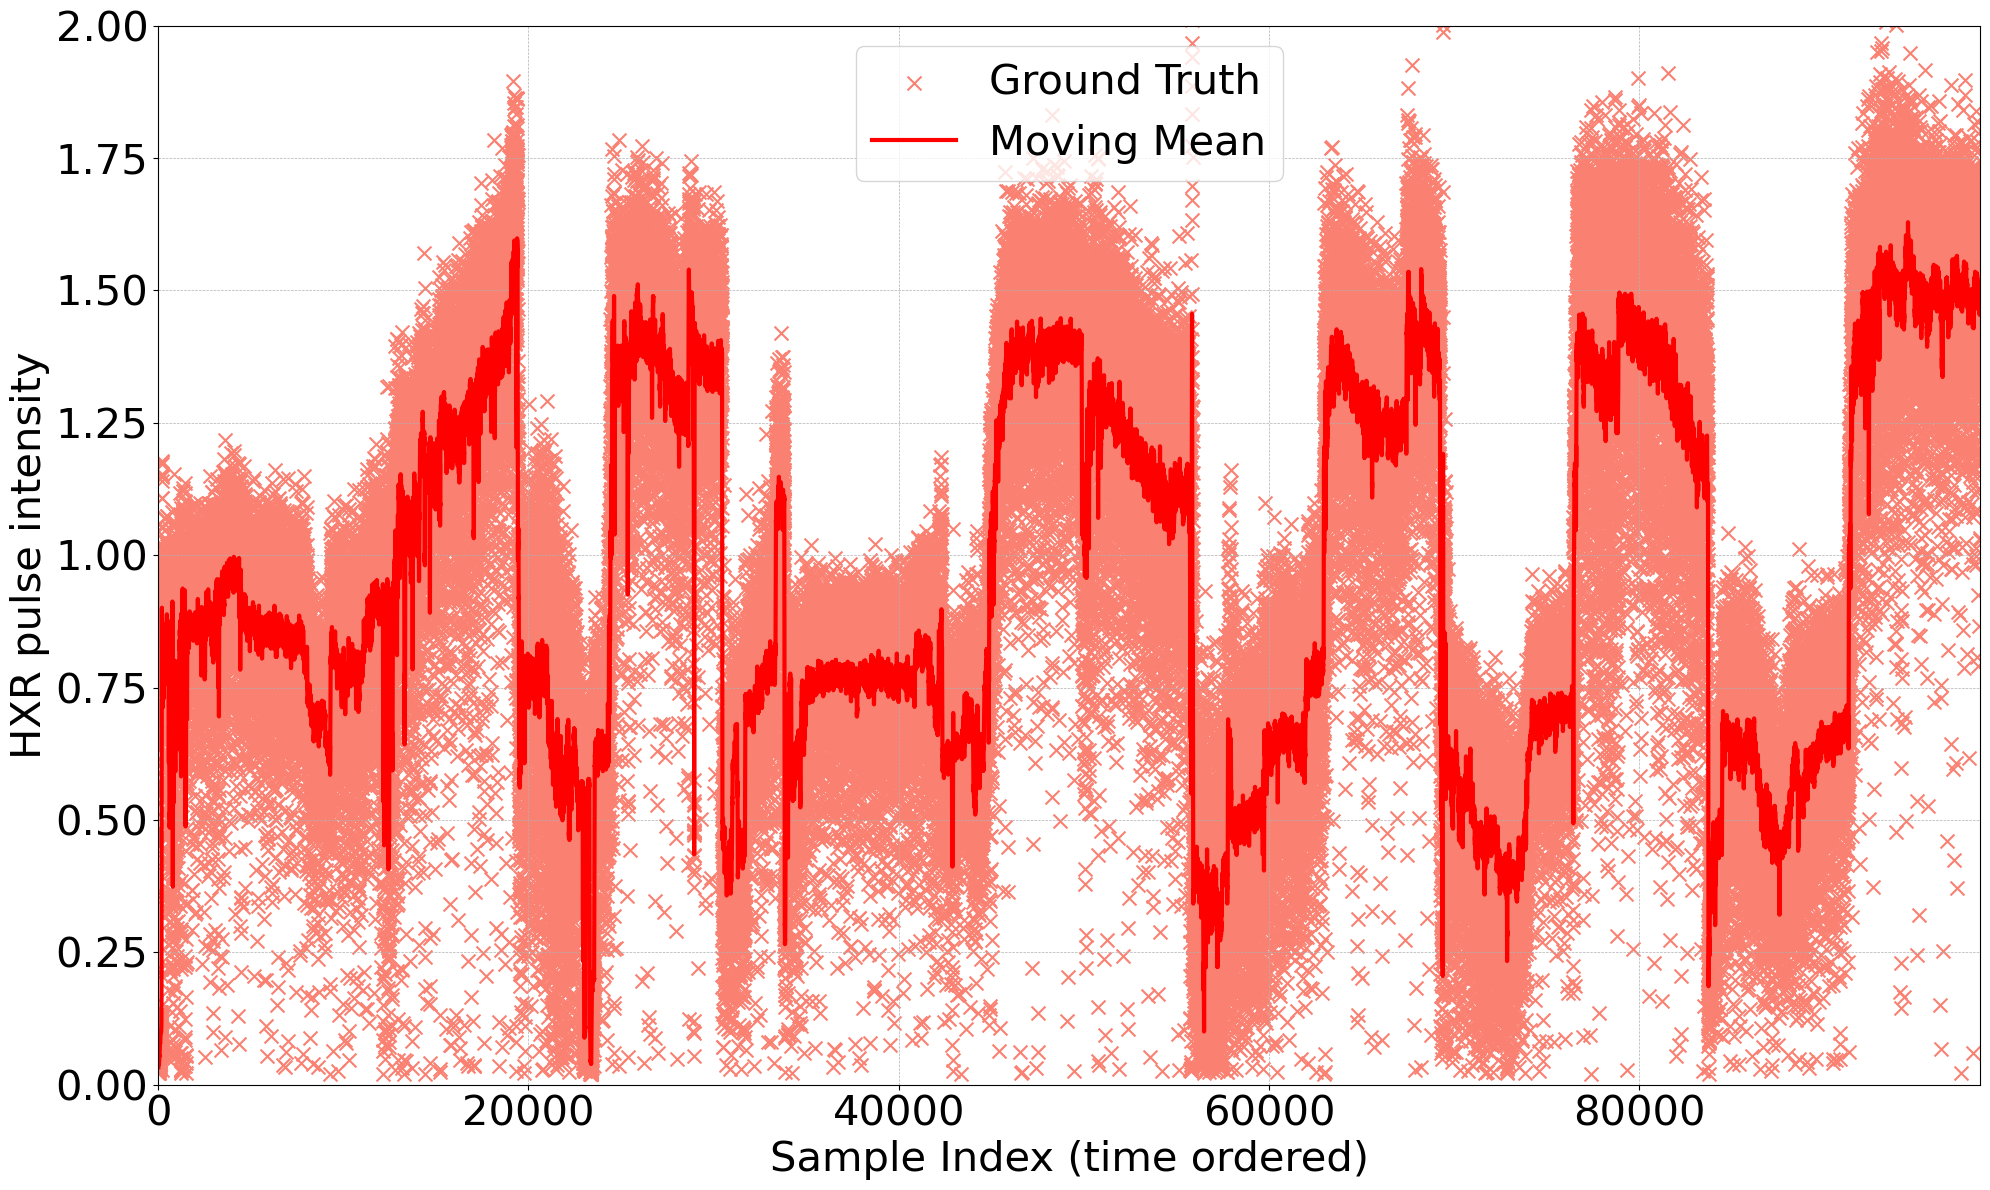

In [17]:
shot_axis = np.arange(len(ground_truth))
plt.figure(figsize=(20,12))
plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=100)
plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=3)
fontsize = 30
plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
plt.ylim([-0, 2])
plt.legend(fontsize=fontsize)
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

In [163]:
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'  
ensemble_name1 = '2024-02-29_19-27-35_ensemble/'
loaded_models1, loaded_input_scaler1, loaded_output_scaler1, loaded_input_cols1, loaded_output_cols1 = load_ensemble_models(model_path, ensemble_name1)
new_mean_predictions_loaded1, new_std_predictions_loaded1 = predict_with_ensemble(test_df=new_test_df.iloc[indices],
                                                                               models=loaded_models1,        
                                                                               input_cols=loaded_input_cols1, 
                                                                               output_cols=loaded_output_cols1,
                                                                               input_scaler=loaded_input_scaler1,
                                                                               output_scaler=loaded_output_scaler1)
# ensemble_name2 = '2024-02-26_15-26-14_ensemble/' #'2024-02-23_01-00-17_ensemble/'
# loaded_models2, loaded_input_scaler2, loaded_output_scaler2, loaded_input_cols2, loaded_output_cols2 = load_ensemble_models(model_path, ensemble_name2)
# new_mean_predictions_loaded2, new_std_predictions_loaded2 = predict_with_loaded_ensemble(test_df=new_test_df.iloc[indices],
#                                                                                loaded_models=loaded_models2,        
#                                                                                input_cols=loaded_input_cols2, 
#                                                                                output_cols=loaded_output_cols2,
#                                                                                loaded_input_scaler=loaded_input_scaler2,
#                                                                                loaded_output_scaler=loaded_output_scaler2)

# ensemble_name3 = '2024-02-26_15-26-14_ensemble/'
# loaded_models3, loaded_input_scaler3, loaded_output_scaler3, loaded_input_cols3, loaded_output_cols3 = load_ensemble_models(model_path, ensemble_name3)
# new_mean_predictions_loaded2, new_std_predictions_loaded2 = predict_with_loaded_ensemble(test_df=new_test_df.iloc[indices],
#                                                                                loaded_models=loaded_models3,        
#                                                                                input_cols=loaded_input_cols3, 
#                                                                                output_cols=loaded_output_cols2,
#                                                                                loaded_input_scaler=loaded_input_scaler2,
#                                                                                loaded_output_scaler=loaded_output_scaler2)

Ensemble models 2024-02-29_19-27-35_ensemble/ and scalers loaded successfully.


Percentage of predictions where the confidence interval covers the ground truth: 53.39%


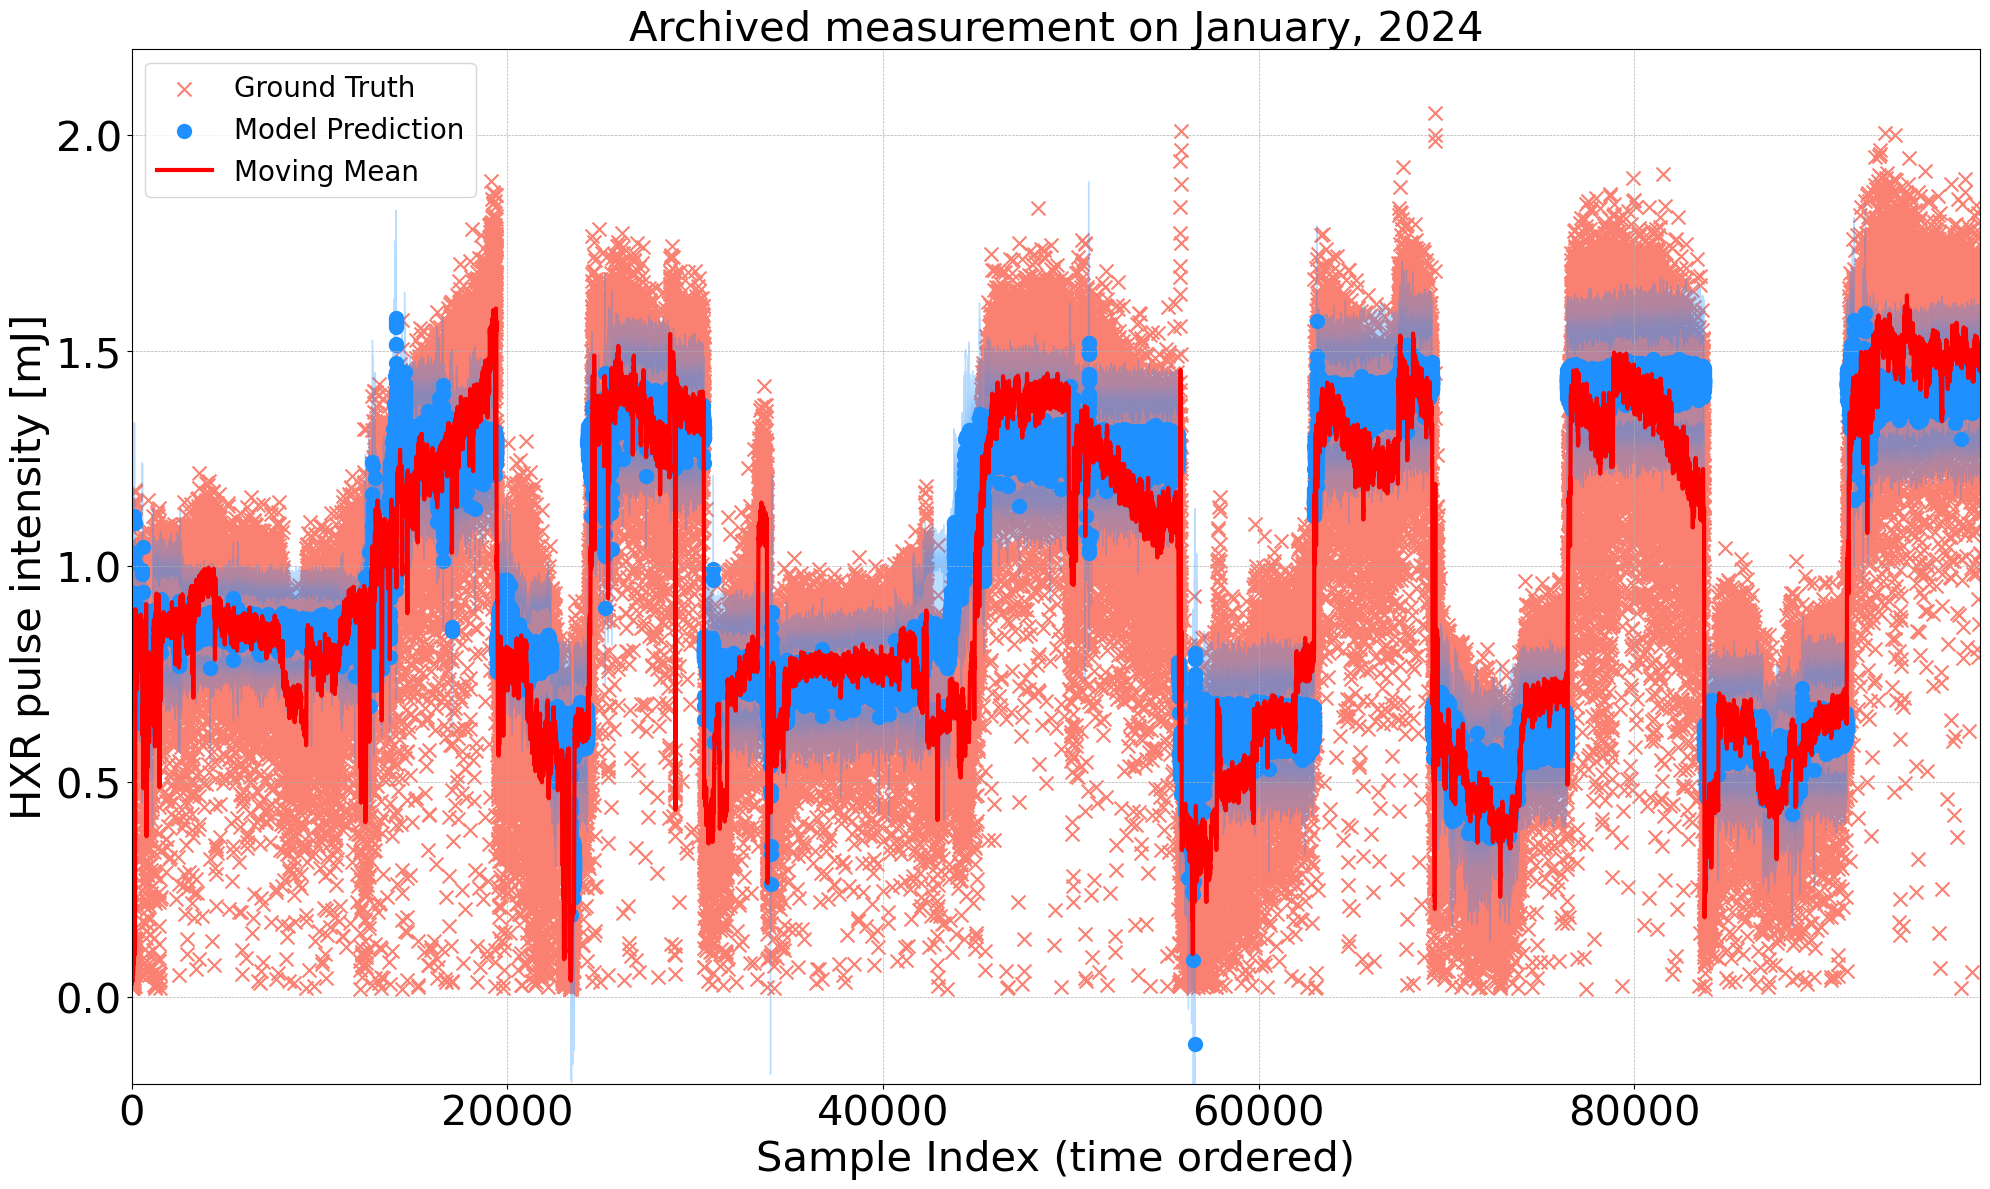

In [164]:
# plotting
fontsize = 30
plt.figure(figsize=(20,12))
shot_axis = np.arange(len(ground_truth))
# Ground truth and predictions for the selected a subset

plt.scatter(shot_axis, ground_truth, label='Ground Truth', color='salmon', marker='x',s=100)
plt.scatter(shot_axis, new_mean_predictions_loaded1, label='Model Prediction', color='dodgerblue', marker='o', s=100)
# plt.scatter(shot_axis, new_mean_predictions_loaded2, label='Model2 prediction', color='yellowgreen', marker='o', s=100)

plt.plot(ground_truth_moving_avg, label='Moving Mean', color='red', linewidth=3)
# Confidence interval (e.g., mean +/- 2*std_dev for 95% confidence interval) for the selected subset
lower_bound1 = (new_mean_predictions_loaded1 - 2 * new_std_predictions_loaded1).numpy().flatten()
upper_bound1 = (new_mean_predictions_loaded1 + 2 * new_std_predictions_loaded1).numpy().flatten()
plt.fill_between(range(num_samples_to_plot), lower_bound1, upper_bound1, color='dodgerblue', alpha=0.3)

cover_perc1 = eval_cover_perc(ground_truth, lower_bound1, upper_bound1)
print(f"Percentage of predictions where the confidence interval covers the ground truth: {cover_perc1:.2f}%")
    
# lower_bound2 = (new_mean_predictions_loaded2 - 2 * new_std_predictions_loaded2).numpy().flatten()
# upper_bound2 = (new_mean_predictions_loaded2 + 2 * new_std_predictions_loaded2).numpy().flatten()
# plt.fill_between(range(num_samples_to_plot), lower_bound2, upper_bound2, color='yellowgreen', alpha=0.3)

plt.xlabel('Sample Index (time ordered)', fontsize=fontsize)
plt.ylabel('HXR pulse intensity [mJ]',fontsize=fontsize)
plt.title('Archived measurement on January, 2024',fontsize=fontsize)
plt.xlim([0, num_samples_to_plot])
plt.ylim([-0.2, 2.2])
plt.legend(fontsize=20, loc='upper left')
plt.tick_params(labelsize=fontsize)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### Save the ensemble

In [ ]:
# Define base directory for saving models and scalers
model_path = '/sdf/data/ad/ard/u/zihanzhu/ml/lcls_fel_tuning/model/'
ensemble_folder_name = datetime.now().strftime("%Y-%m-%d_%H-%M-%S") + '_ensemble/'
ensemble_path = os.path.join(model_path, ensemble_folder_name)

# Create directory if it does not exist
if not os.path.exists(ensemble_path):
    os.makedirs(ensemble_path)

torch.save(input_scaler, ensemble_path + 'lcls_fel_input_scaler.pt')
torch.save(output_scaler, ensemble_path + 'lcls_fel_output_scaler.pt')

# Save each model and its scalers
for idx, model in enumerate(ensemble_models):
    model_file_name = f'model_{idx}.pt'
    # input_scaler_file_name = f'input_scaler_{idx}.pt'
    # output_scaler_file_name = f'output_scaler_{idx}.pt'

    torch.save(model, os.path.join(ensemble_path, model_file_name))
    # torch.save(input_scaler, os.path.join(ensemble_path, input_scaler_file_name))
    # torch.save(output_scaler, os.path.join(ensemble_path, output_scaler_file_name))

file_name = 'feature_config.yaml'
with open(ensemble_path+file_name, 'w') as file:
    yaml.dump(yaml_dict, file, sort_keys=False)
print(f"Ensemble models and scalers saved in: {ensemble_path}")


### Scan each quads within the range from [25th percentiles, 75th percentiles] and use model for prediction

In [ ]:
for i in range(len(input_cols)):
    lower_limit = final_df[input_cols[i]].min() #np.percentile(final_df[input_cols[i]], 25)
    upper_limit = final_df[input_cols[i]].max() #np.percentile(final_df[input_cols[i]], 75)
    print(input_cols[i])
    print((lower_limit+upper_limit)/2)
    print(f'[{lower_limit}, {upper_limit}]')

QUAD:IN20:121:BCTRL
9.815625000000362e-06
[-0.012480468749999998, 0.012500099999999998]
QUAD:IN20:122:BCTRL
0.0016666499999999987
[-0.0113889, 0.014722199999999998]
QUAD:IN20:361:BCTRL
-3.1912712655963698
[-3.968117398804593, -2.4144251323881467]
QUAD:IN20:371:BCTRL
2.6479426792658227
[2.1427768, 3.1531085585316454]
QUAD:IN20:425:BCTRL
-2.089852778252441
[-4.28841434571622, 0.10870878921133746]
QUAD:IN20:441:BCTRL
0.7557443913926831
[-1.0663900000000006, 2.577878782785367]
QUAD:IN20:511:BCTRL
2.4988931379431514
[1.1212810008863023, 3.8765052750000004]
QUAD:IN20:525:BCTRL
-2.525507684439561
[-4.833550033593535, -0.2174653352855879]
QUAD:LI21:201:BCTRL
-4.49425916526729
[-7.160144490534581, -1.82837384]
QUAD:LI21:211:BCTRL
4.7617965848432755
[2.8354025442857145, 6.6881906254008365]
QUAD:LI21:221:BCTRL
0.019628469478614713
[-0.2466485000000001, 0.28590543895722953]
QUAD:LI21:251:BCTRL
-0.20201520583008098
[-0.9495085116601619, 0.5454781]
QUAD:LI21:271:BCTRL
-6.091769296756029
[-7.45172023

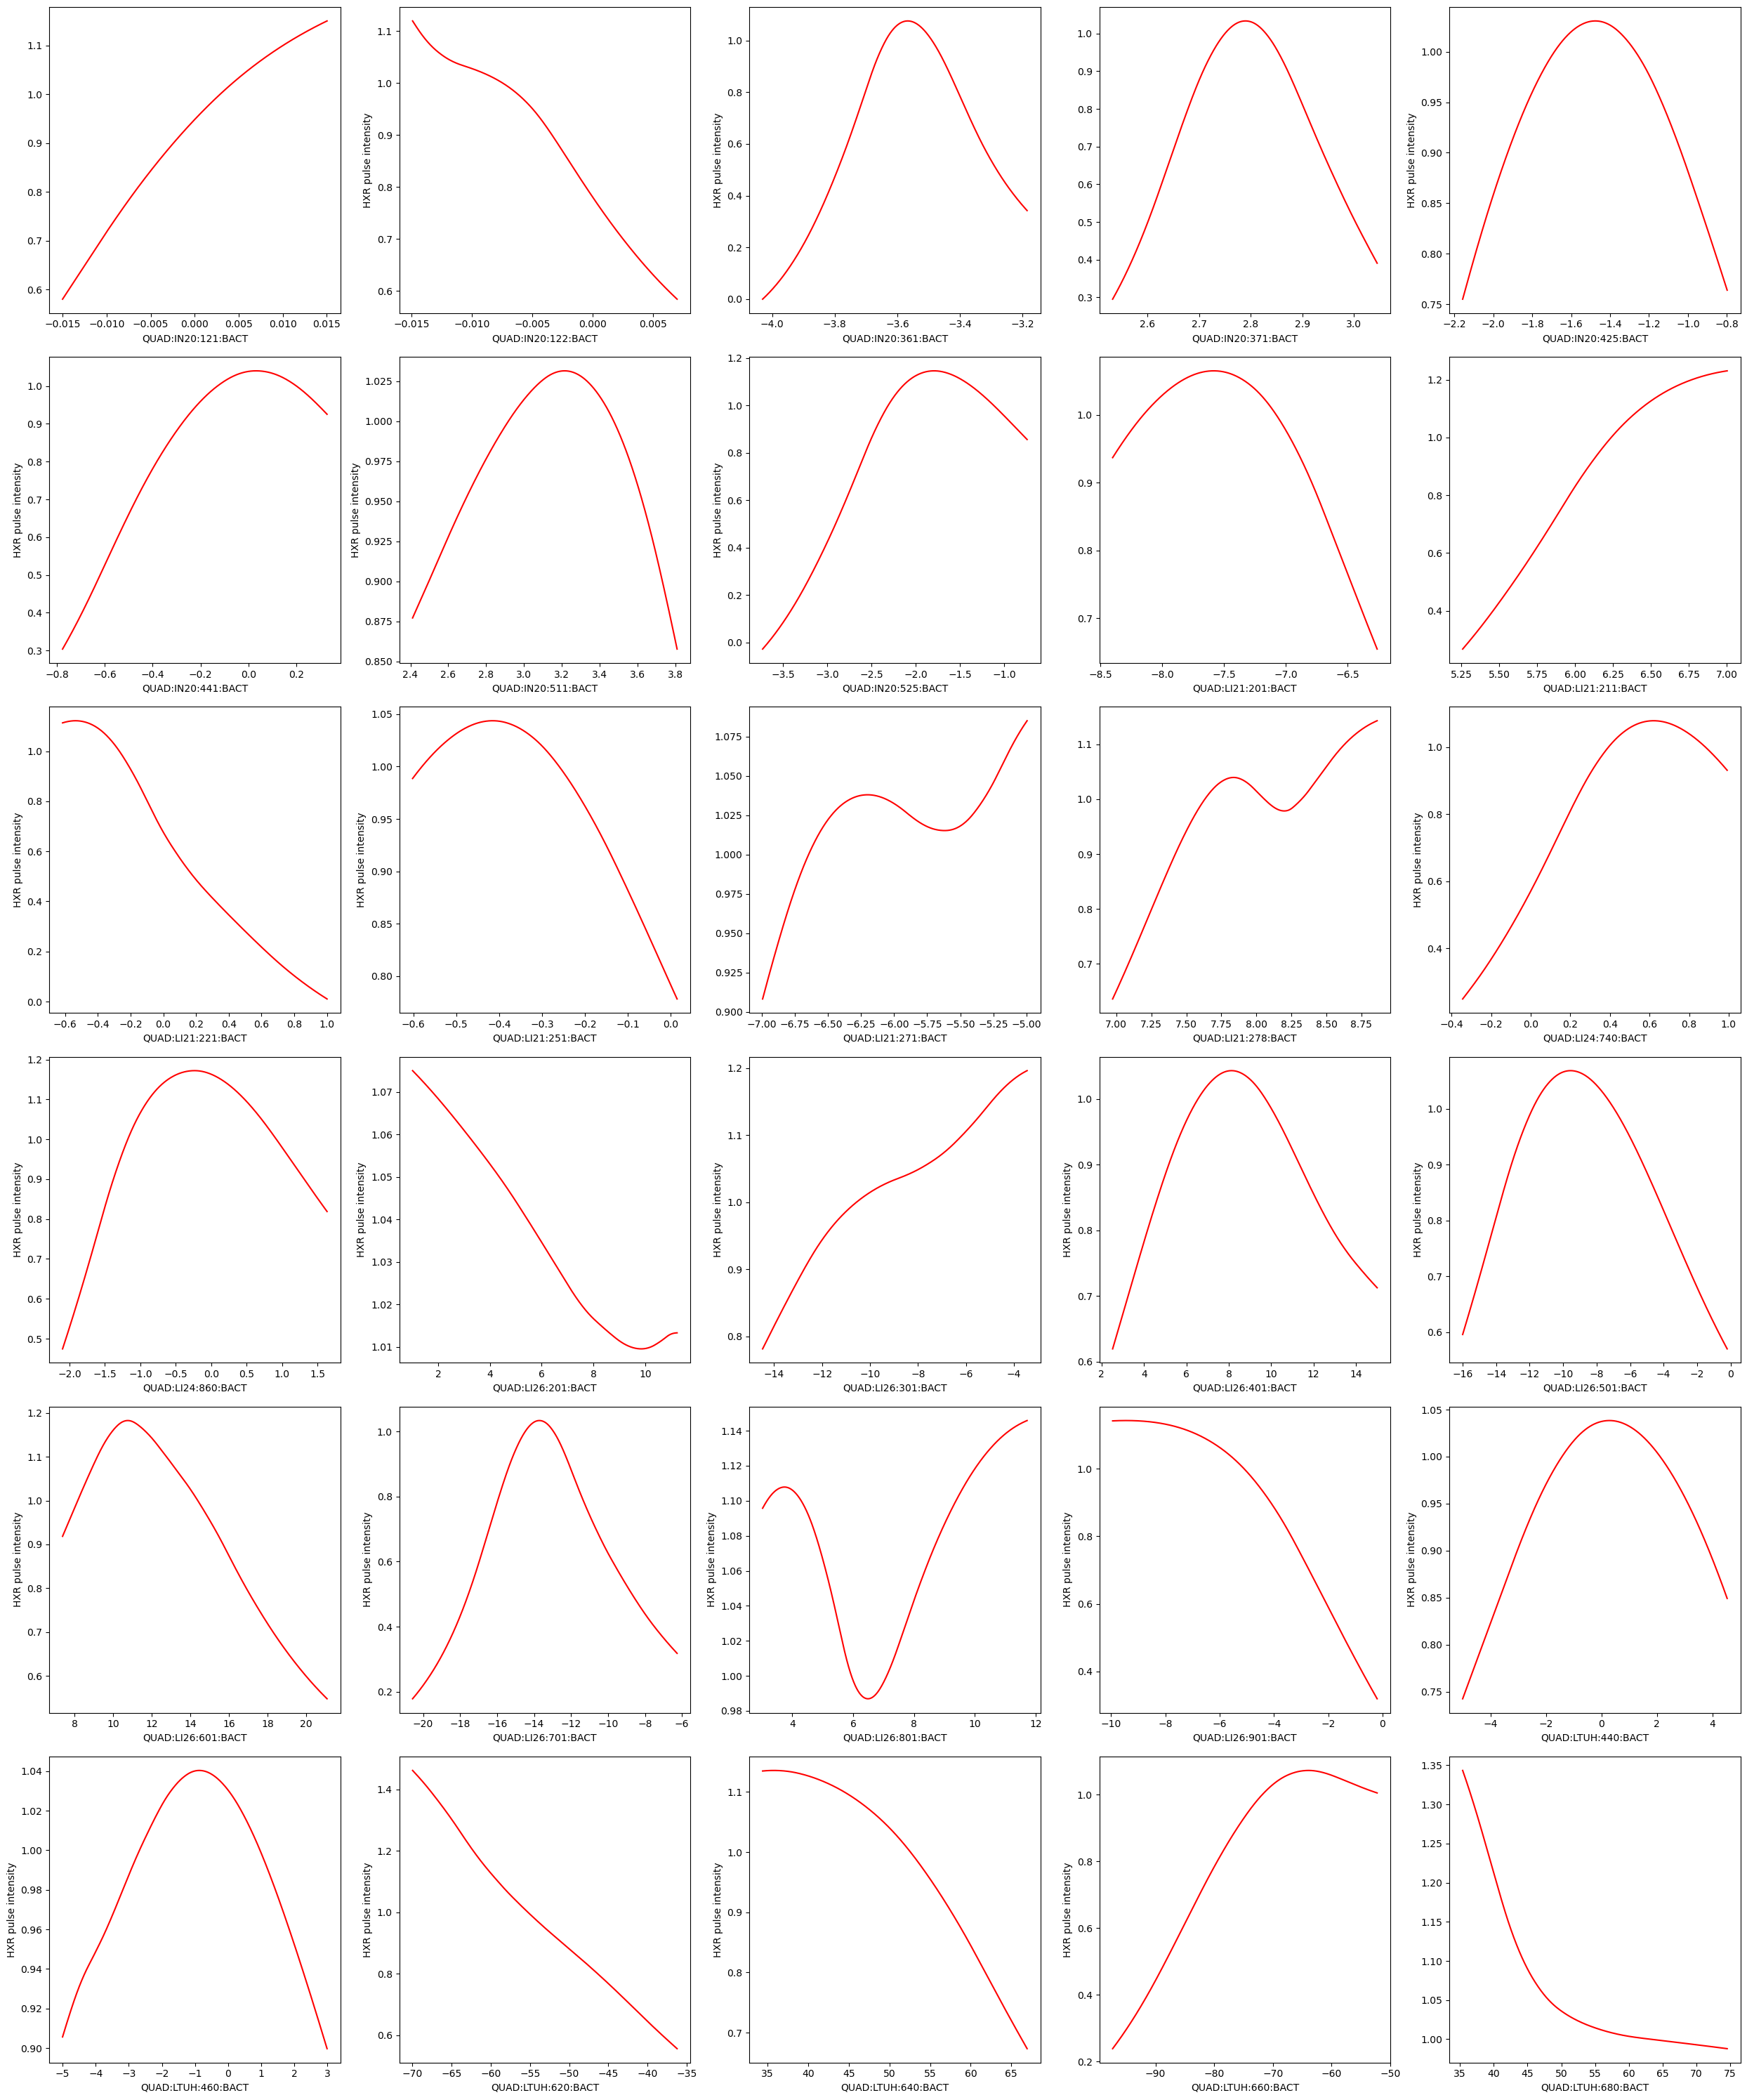

In [ ]:

nrows, ncols = 6, 5
figsize = (25, 25 * nrows / ncols)

fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=False, figsize=figsize)


for i in range(nrows * ncols):
    ax_i = ax[i // ncols, i % ncols]
    column_name = input_cols[i]
    lower_limit = final_df[column_name].min() #np.percentile(final_df[column_name], 25)
    upper_limit = final_df[column_name].max() #np.percentile(final_df[column_name], 75)
    step = (upper_limit - lower_limit) / 1000  # define  step size
    
    mean_row = pd.DataFrame(final_df.mean()).transpose()
    # Create an empty DataFrame to store the results
    scanned_df = pd.DataFrame(columns=final_df.columns)
    
    # Iterate over the range of values for the specific column
    for i, value in enumerate(np.arange(lower_limit, upper_limit + step, step)):
        new_row = mean_row.copy()
        new_row.at[0, column_name] = value  
        scanned_df = pd.concat([scanned_df, new_row], ignore_index=True)
    
        # Transform the input data using the input_scaler
        # scaled_inputs = torch.from_numpy(input_scaler.transform(scanned_df[input_cols].values)).float() # for sklearn
        scaled_inputs = input_scaler.transform(torch.tensor(scanned_df[input_cols].values.astype('float32'), dtype=torch.float32)) # for botorch
        # Pass the scaled inputs through model
        model_outputs = model(scaled_inputs)
    
        # Inverse transform the model outputs using the output_scaler
        # final_output = output_scaler.inverse_transform(model_outputs.detach().numpy()) # for sklearn
        final_output = output_scaler._untransform(model_outputs).detach().numpy() # for botorch  
    ax_i.plot(scanned_df[column_name], final_output, color="red")
    ax_i.set_xlabel(column_name)
    if i % ncols == 0:
        ax_i.set_ylabel("HXR pulse intensity")
fig.tight_layout()
